# Import of libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#Exploration of data with APC
from sklearn.decomposition import PCA

#feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#encoding categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

#evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix

#classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#model saving and loading
import joblib

#feature importance
from sklearn.ensemble import RandomForestClassifier

#typing
from typing import Dict

# Import data from URL

In [2]:
url = "https://raw.githubusercontent.com/remijul/dataset/master/Airline%20Passenger%20Satisfaction.csv"
df = pd.read_csv(url, sep=";")

#### Check of the general structure of the data

In [3]:
df.head()

,id,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [9]:
df.describe(include='all')

,id,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
unique,NaN,2,2,2,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,satisfied,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,71087,65899,106100,NaN,89693,62160,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,64940.500000,NaN,NaN,NaN,39.427957,NaN,NaN,1981.409055,2.838597,2.990645,...,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,37493.270818,NaN,NaN,NaN,15.119360,NaN,NaN,1027.115606,1.392983,1.527224,...,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,1.000000,NaN,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,NaN,NaN,NaN,27.000000,NaN,NaN,1359.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,NaN,NaN,NaN,40.000000,NaN,NaN,1925.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,NaN,NaN,NaN,51.000000,NaN,NaN,2544.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Satisfaction                       129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [11]:
df.shape

(129880, 24)

In [12]:
df.columns

Index(['id', 'Satisfaction', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [13]:
df.isna().sum()

id                                     0
Satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

# Exploratory Data Analyses

#### 1- Data cleaning : 

In [5]:
#drop NA :
df.dropna(inplace = True)

In [4]:
df.shape

(129487, 24)

#### 2- Distribution of the Target (Satisfaction)

In [30]:
df['Satisfaction'].value_counts(normalize=True)

satisfied                  0.547406
neutral or dissatisfied    0.452594
Name: Satisfaction, dtype: float64

#### 3-Distribution of features

In [17]:
df.columns

Index(['id', 'Satisfaction', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [74]:
#non_numerical features :
cat_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [75]:
#numerical features
numeric_vars = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
                'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
                'Checkin service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

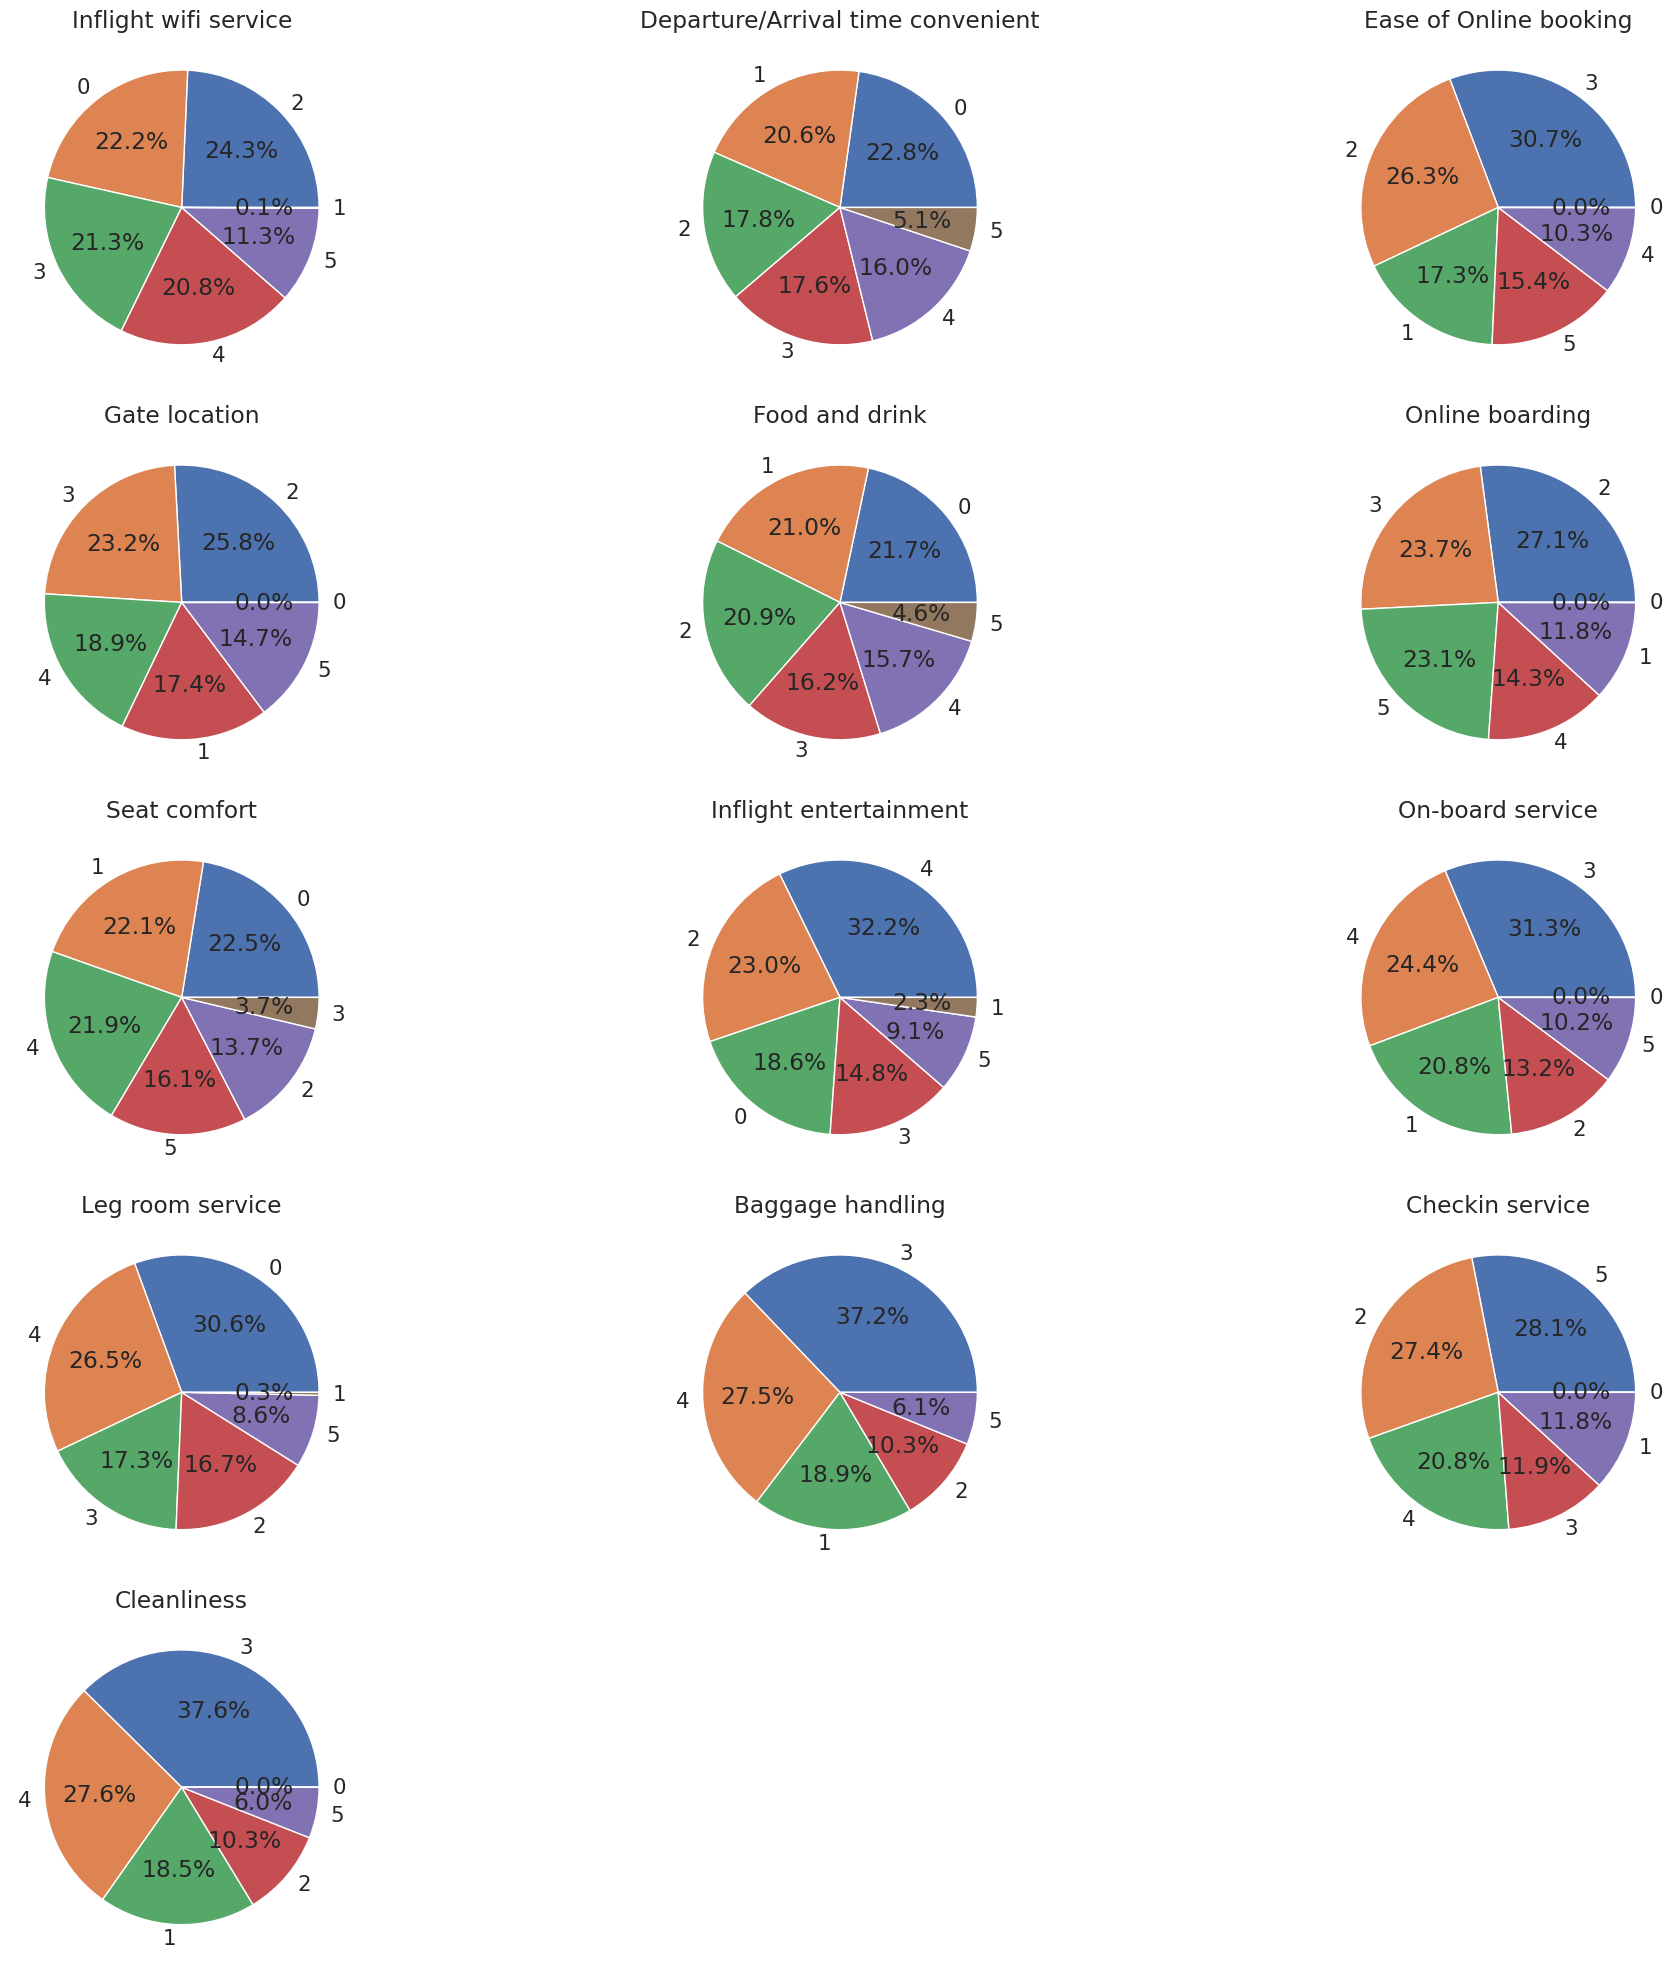

In [65]:
numeric_vars_piechart = ['Inflight wifi service', 'Departure/Arrival time convenient',
                'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
                'Checkin service', 'Cleanliness']
plt.figure(figsize=(20, 20))

for i, col in enumerate(numeric_vars_piechart):
    plt.subplot(5, 3, i+1)
    plt.pie(df[col].value_counts(), labels=df[col].unique(), autopct='%1.1f%%')
    plt.title(col)

plt.tight_layout()
plt.show()

In [54]:
# table to compare the various ration between 0, 1, 2, 3, 4 and 5 among the following features :
numeric_vars_piechart = ['Inflight wifi service', 'Departure/Arrival time convenient',
                'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
                'Checkin service', 'Cleanliness']
dfs = []
for col in numeric_vars_piechart:
    df_temp = pd.DataFrame(df[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%', 
             index=df[col].unique(), 
             columns=[col])
    df_temp.index.name = None
    df_temp.sort_index(inplace=True)
    dfs.append(df_temp)

result = pd.concat(dfs, axis=1)
display(result)

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness
0,0.1%,5.1%,0.0%,0.0%,4.6%,0.0%,3.7%,2.3%,0.0%,0.3%,NaN,0.0%,0.0%
1,11.3%,16.0%,10.3%,17.4%,16.2%,11.8%,16.1%,9.1%,10.2%,8.6%,6.1%,11.8%,6.0%
2,20.8%,17.6%,15.4%,18.9%,20.9%,14.3%,22.1%,14.8%,13.2%,16.7%,10.3%,11.9%,10.3%
3,21.3%,17.8%,17.3%,25.8%,21.7%,23.7%,22.5%,18.6%,20.8%,17.3%,18.9%,27.4%,18.5%
4,24.3%,22.8%,30.7%,23.2%,21.0%,27.1%,21.9%,32.2%,31.3%,30.6%,37.2%,28.1%,37.6%
5,22.2%,20.6%,26.3%,14.7%,15.7%,23.1%,13.7%,23.0%,24.4%,26.5%,27.5%,20.8%,27.6%


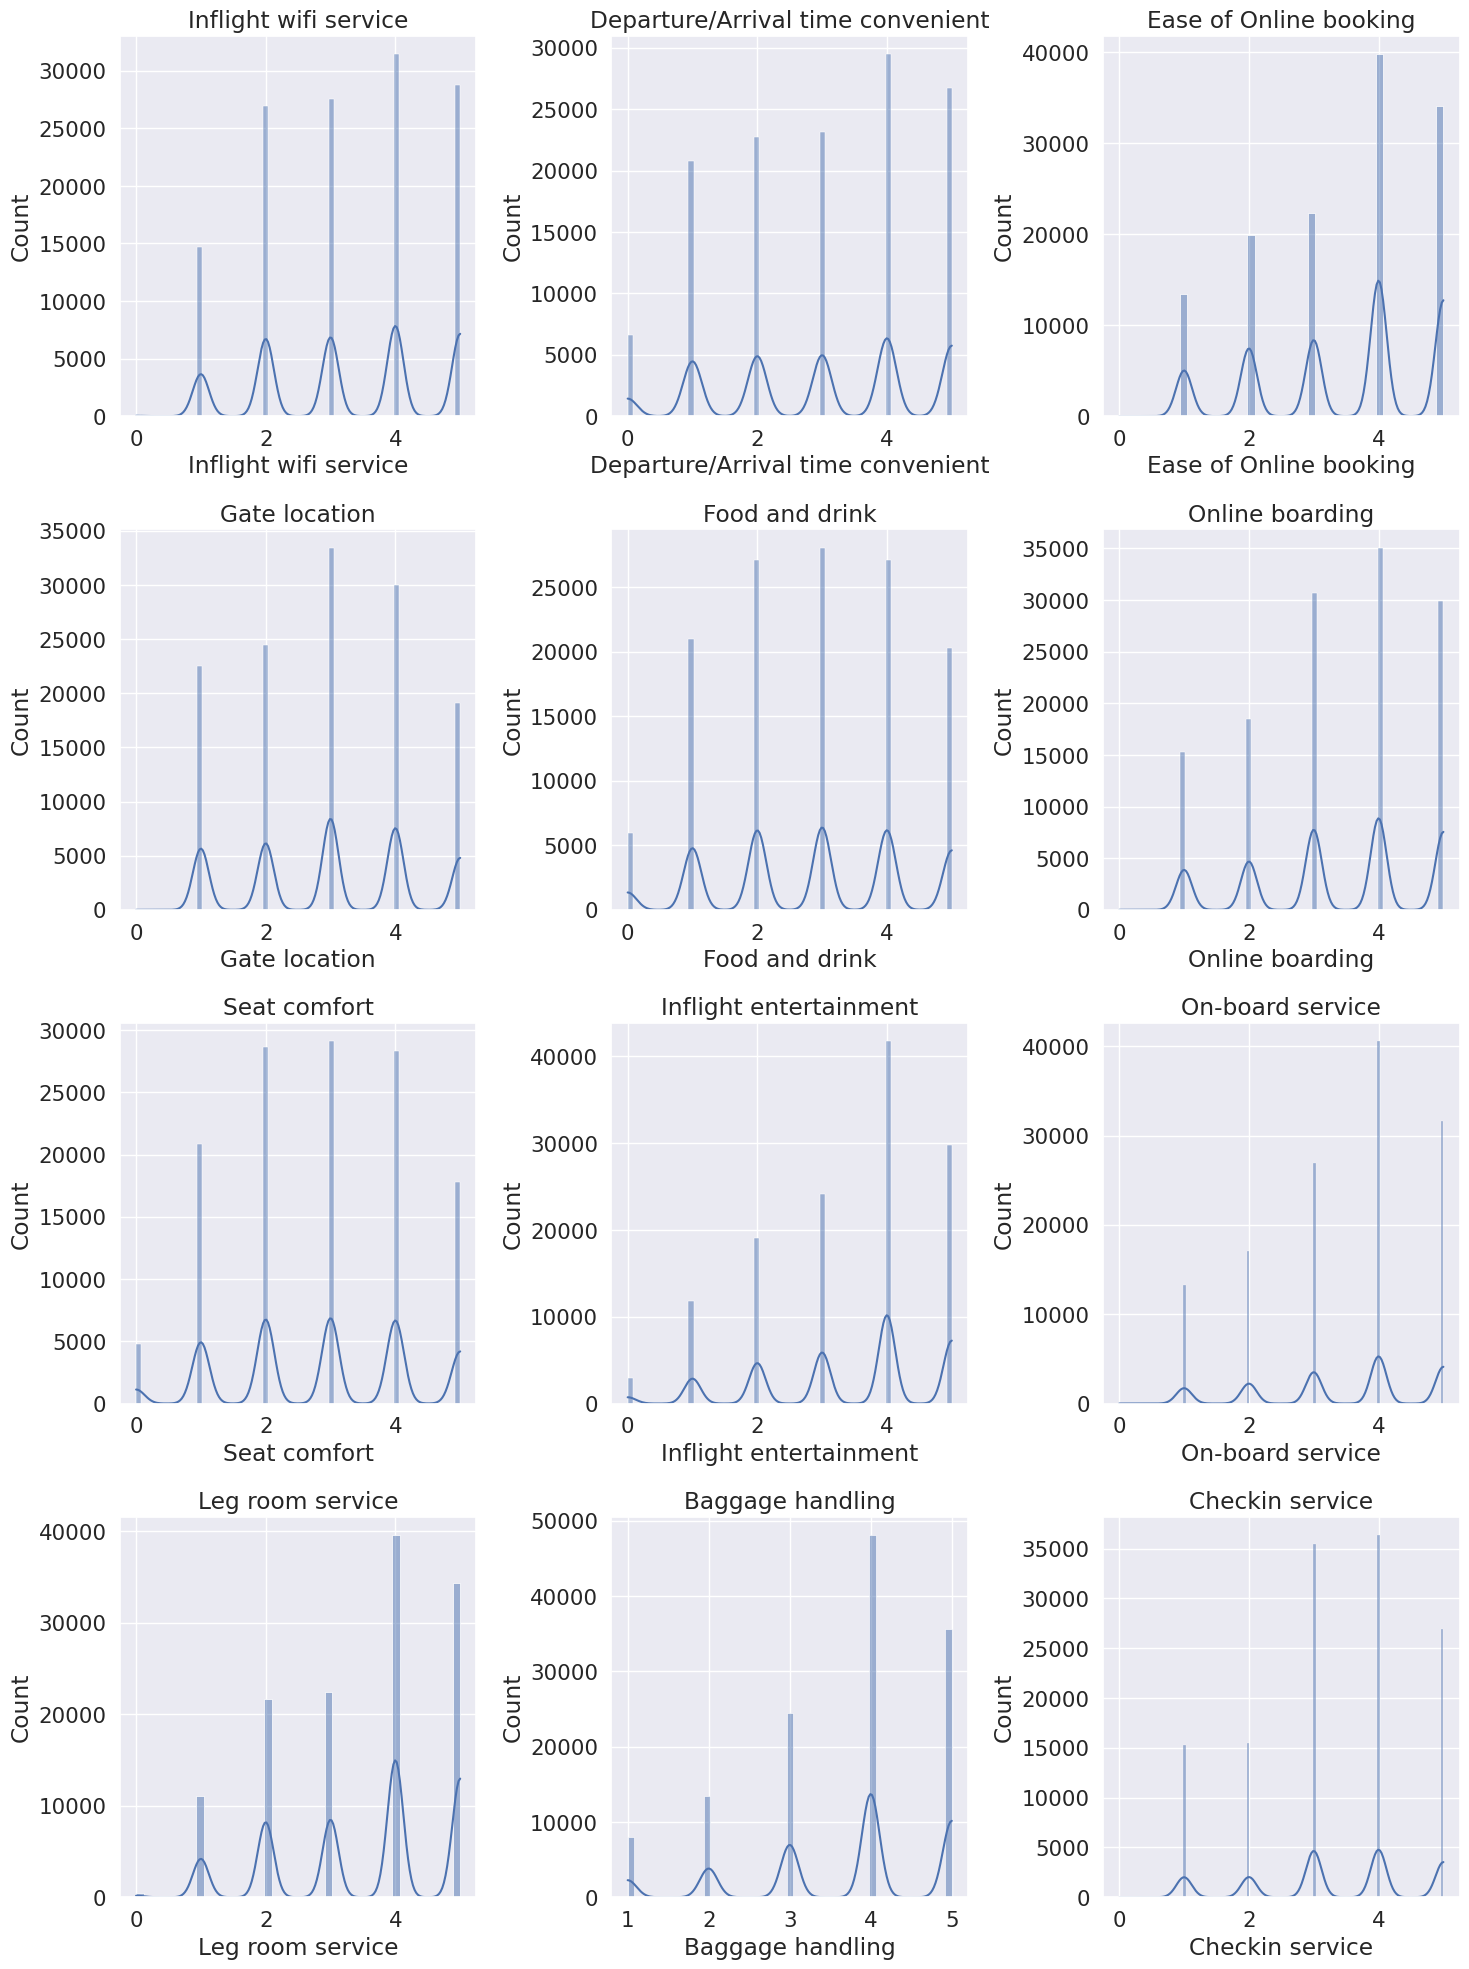

In [56]:
#check if features follow normal law (to be used later to choose the transformer in the ML part) not for visualisation
numeric_vars_histo = ['Inflight wifi service', 'Departure/Arrival time convenient',
                'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
                'Checkin service', 'Cleanliness']
n_vars = len(numeric_vars_histo)
n_rows = int(n_vars ** 0.5) + 1
n_cols = int(n_vars ** 0.5)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 5))
for i, ax in enumerate(axes.flat):
    if i < len(numeric_vars_histo):
        sns.histplot(df[numeric_vars_histo[i]], kde=True, ax=ax)
        ax.set_title(numeric_vars_histo[i])

plt.tight_layout()
plt.show()


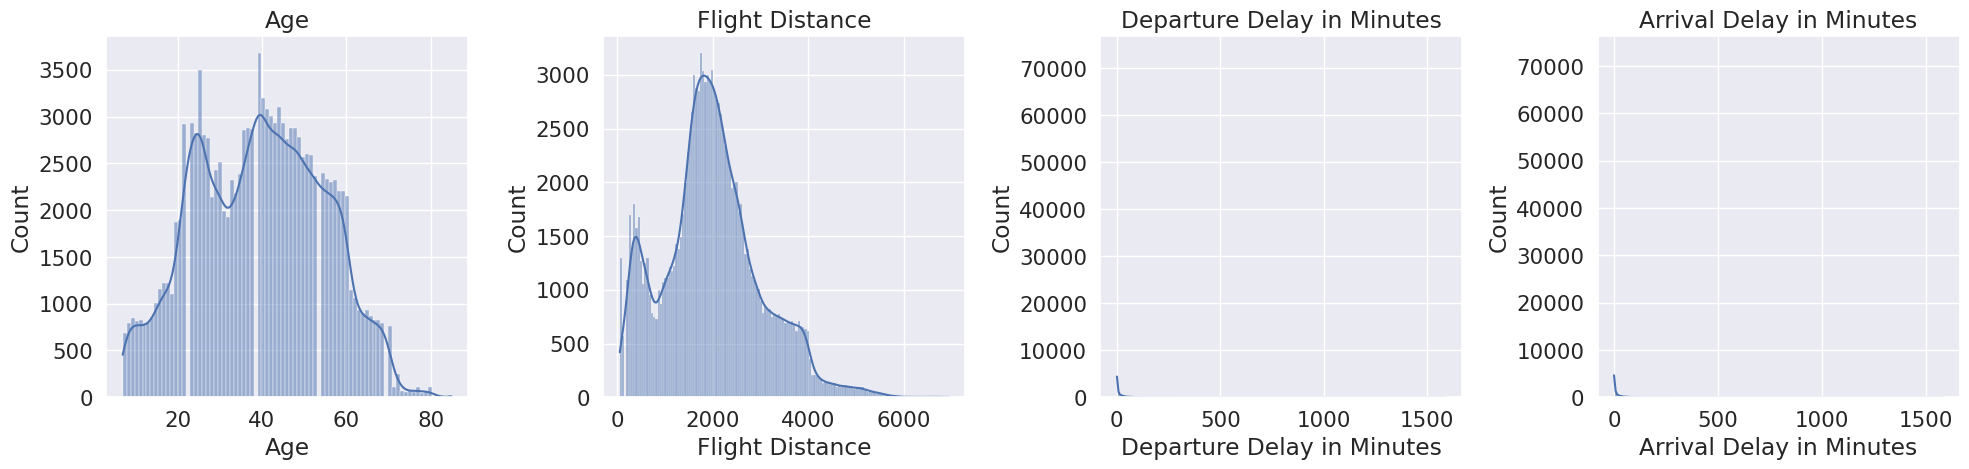

In [58]:
numeric_vars_histogramme = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
n_vars = len(numeric_vars_histogramme)

fig, axes = plt.subplots(nrows=1, ncols=n_vars, figsize=(n_vars * 5, 5))
for i, ax in enumerate(axes.flat):
    sns.histplot(df[numeric_vars_histogramme[i]], kde=True, ax=ax)
    ax.set_title(numeric_vars_histogramme[i])

plt.tight_layout()
plt.show()

In [35]:
for col in cat_vars:
    print(col, df[col].unique())

Gender ['Female' 'Male']
Customer Type ['Loyal Customer' 'disloyal Customer']
Type of Travel ['Personal Travel' 'Business travel']
Class ['Eco' 'Business' 'Eco Plus']


In [64]:
result_non_numericalF = pd.DataFrame()

for col in cat_vars:
    freq_table = pd.DataFrame(df[col].value_counts())
    freq_table['percentage'] = freq_table[col] * 100 / freq_table[col].sum()
    freq_table.columns = [col, col + ' percentage']
    result_non_numericalF = pd.concat([result_non_numericalF, freq_table], axis=1)
    
result_non_numericalF = result_non_numericalF.reindex(sorted(result_non_numericalF.columns), axis=1)

display(result_non_numericalF)

,Class,Class percentage,Customer Type,Customer Type percentage,Gender,Gender percentage,Type of Travel,Type of Travel percentage
Female,NaN,NaN,NaN,NaN,65703.0,50.741001,NaN,NaN
Male,NaN,NaN,NaN,NaN,63784.0,49.258999,NaN,NaN
Loyal Customer,NaN,NaN,105773.0,81.686192,NaN,NaN,NaN,NaN
disloyal Customer,NaN,NaN,23714.0,18.313808,NaN,NaN,NaN,NaN
Business travel,NaN,NaN,NaN,NaN,NaN,NaN,89445.0,69.076432
Personal Travel,NaN,NaN,NaN,NaN,NaN,NaN,40042.0,30.923568
Business,61990.0,47.873532,NaN,NaN,NaN,NaN,NaN,NaN
Eco,58117.0,44.882498,NaN,NaN,NaN,NaN,NaN,NaN
Eco Plus,9380.0,7.243970,NaN,NaN,NaN,NaN,NaN,NaN


#### 3- Exploratory PCA :

In [76]:
#transformation of categorical features in numericals 
cat_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
cat_df = pd.get_dummies(df[cat_vars], drop_first=True)


In [77]:
#We concatenate all features (numerical and transformed)
X = pd.concat([df[numeric_vars], cat_df], axis=1)
print(X.columns)


Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus'],
      dtype='object')


In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
pca = PCA()
pca.fit(X)

PCA()

In [80]:
var_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :", var_ratio)

Variance expliquée par chaque composante principale : [9.97049795e-01 2.67761439e-03 2.02649951e-04 4.78735950e-05
 5.76296072e-06 4.44849048e-06 2.84585694e-06 1.74018020e-06
 1.42215584e-06 9.77190215e-07 8.72256419e-07 7.32732204e-07
 6.75029291e-07 5.69570372e-07 4.78714749e-07 4.60839986e-07
 3.14558131e-07 2.81333836e-07 2.22743255e-07 1.49917034e-07
 7.25337143e-08 3.95283160e-08]


In [81]:
loadings = pca.components_
print(loadings)

[[-3.67276257e-03  9.99976151e-01  1.57979401e-05  2.05148937e-06
  -2.84024136e-05 -2.95075239e-06 -6.76368715e-06  1.22220413e-05
  -5.76220244e-05 -3.58604366e-05 -4.01383219e-05 -3.80267257e-05
   2.21283867e-05  3.09609402e-06  1.05107066e-05  4.13366645e-03
   4.13536079e-03  5.87863688e-05  7.17871183e-06 -5.54380285e-05
  -6.69282286e-05 -1.32024920e-05]
 [ 5.44343446e-03 -5.82692317e-03 -8.94346404e-04  9.55542810e-05
  -8.90198792e-04  1.01280350e-04 -3.74780733e-04 -5.44339630e-04
  -5.31659901e-04 -7.36157178e-04 -8.70274189e-04  1.33213578e-04
  -3.20155697e-04 -5.43197413e-04 -1.44513797e-03  7.01891836e-01
   7.12234550e-01 -1.06395224e-04  1.40638963e-05  6.60996688e-05
   2.44245726e-04  4.86749260e-05]
 [ 9.99754551e-01  3.70372861e-03  1.75491870e-03  4.29223338e-03
   6.30908202e-03 -1.08796691e-04  1.57222322e-03  3.86285466e-03
  -6.60096679e-05  1.19406623e-02  5.41234148e-03  7.04391546e-03
  -7.71529831e-04  2.98027739e-03 -1.14277842e-03  4.45761646e-04
  -8.0

In [82]:
component_num = 0 # first PC plus laodings
loadings_abs = np.abs(loadings[component_num, :])
sorted_idx = np.argsort(loadings_abs)[::-1]
print("Variables triées par ordre décroissant de charge sur la première composante principale :")
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {loadings[component_num, idx]: .3f}")

Variables triées par ordre décroissant de charge sur la première composante principale :
Flight Distance:  1.000
Arrival Delay in Minutes:  0.004
Departure Delay in Minutes:  0.004
Age: -0.004
Class_Eco: -0.000
Gender_Male:  0.000
Seat comfort: -0.000
Type of Travel_Personal Travel: -0.000
On-board service: -0.000
Leg room service: -0.000
Inflight entertainment: -0.000
Ease of Online booking: -0.000
Baggage handling:  0.000
Inflight wifi service:  0.000
Class_Eco Plus: -0.000
Online boarding:  0.000
Cleanliness:  0.000
Customer Type_disloyal Customer:  0.000
Food and drink: -0.000
Checkin service:  0.000
Gate location: -0.000
Departure/Arrival time convenient:  0.000


In [83]:
component_num = 1 # second PC plus laodings
loadings_abs = np.abs(loadings[component_num, :])
sorted_idx = np.argsort(loadings_abs)[::-1]
print("Variables triées par ordre décroissant de charge sur la première composante principale :")
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {loadings[component_num, idx]: .3f}")

Variables triées par ordre décroissant de charge sur la première composante principale :
Arrival Delay in Minutes:  0.712
Departure Delay in Minutes:  0.702
Flight Distance: -0.006
Age:  0.005
Cleanliness: -0.001
Inflight wifi service: -0.001
Ease of Online booking: -0.001
On-board service: -0.001
Inflight entertainment: -0.001
Online boarding: -0.001
Checkin service: -0.001
Seat comfort: -0.001
Food and drink: -0.000
Baggage handling: -0.000
Class_Eco:  0.000
Leg room service:  0.000
Gender_Male: -0.000
Gate location:  0.000
Departure/Arrival time convenient:  0.000
Type of Travel_Personal Travel:  0.000
Class_Eco Plus:  0.000
Customer Type_disloyal Customer:  0.000


In [84]:
component_num = 2 # third PC plus laodings
loadings_abs = np.abs(loadings[component_num, :])
sorted_idx = np.argsort(loadings_abs)[::-1]
print("Variables triées par ordre décroissant de charge sur la première composante principale :")
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {loadings[component_num, idx]: .3f}")

Variables triées par ordre décroissant de charge sur la première composante principale :
Age:  1.000
Inflight entertainment:  0.012
Arrival Delay in Minutes: -0.008
Customer Type_disloyal Customer: -0.008
Leg room service:  0.007
Ease of Online booking:  0.006
Class_Eco: -0.006
On-board service:  0.005
Departure/Arrival time convenient:  0.004
Online boarding:  0.004
Flight Distance:  0.004
Checkin service:  0.003
Type of Travel_Personal Travel: -0.002
Inflight wifi service:  0.002
Food and drink:  0.002
Gender_Male:  0.001
Cleanliness: -0.001
Baggage handling: -0.001
Class_Eco Plus: -0.000
Departure Delay in Minutes:  0.000
Gate location: -0.000
Seat comfort: -0.000


In [85]:
component_num = 3 # forth PC plus laodings
loadings_abs = np.abs(loadings[component_num, :])
sorted_idx = np.argsort(loadings_abs)[::-1]
print("Variables triées par ordre décroissant de charge sur la première composante principale :")
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {loadings[component_num, idx]: .3f}")

Variables triées par ordre décroissant de charge sur la première composante principale :
Departure Delay in Minutes: -0.712
Arrival Delay in Minutes:  0.702
Age:  0.006
Cleanliness: -0.003
On-board service: -0.003
Baggage handling: -0.003
Ease of Online booking: -0.002
Checkin service: -0.002
Leg room service: -0.002
Inflight entertainment: -0.002
Inflight wifi service: -0.002
Seat comfort: -0.002
Departure/Arrival time convenient: -0.001
Online boarding: -0.001
Food and drink: -0.001
Class_Eco:  0.001
Gender_Male: -0.000
Gate location: -0.000
Class_Eco Plus:  0.000
Flight Distance:  0.000
Customer Type_disloyal Customer: -0.000
Type of Travel_Personal Travel:  0.000


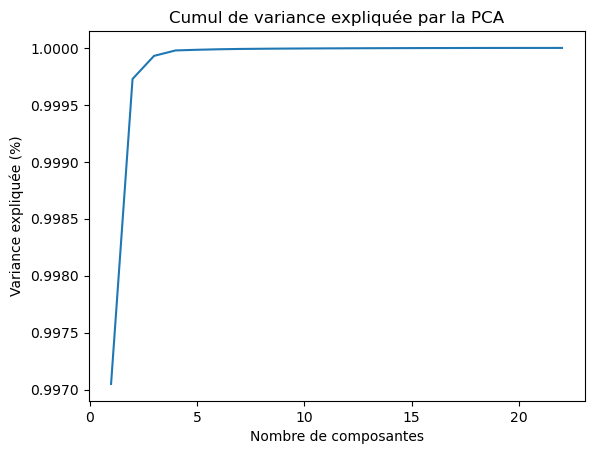

In [29]:
cum_var_ratio = np.cumsum(var_ratio)
plt.plot(range(1, len(cum_var_ratio)+1), cum_var_ratio)
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée (%)')
plt.title('Cumul de variance expliquée par la PCA')
plt.show()

# Model

#### 1- transformation of features

In [15]:
# Preparation of transformers 
X = df.drop(columns=["id", "Satisfaction"])
y = df["Satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

columns_OneHot = ["Gender", "Customer Type", "Type of Travel", "Class"]
columns_MinMax = ["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking",
                "Gate location", "Food and drink", "Online boarding", "Seat comfort",
                "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling",
                "Checkin service", "Cleanliness", 'Online support']
columns_Robust = ["Age","Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

In [16]:
# Transformers
transfo_year = Pipeline([
    ('imputer', SimpleImputer()),
    ('encoder', MinMaxScaler())
])

transfo_data = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

transformers = [
    ('col_OneHot', transfo_data, columns_OneHot),
    ('col_MinMax', transfo_year, columns_MinMax),
    ('col_Robust', RobustScaler(), columns_Robust),
]

preparation = ColumnTransformer(transformers)

#### 2-Training 

In [17]:
# Models to train
models = {
    "rf": RandomForestClassifier(n_estimators=100, n_jobs=-1),
    "knn": KNeighborsClassifier(n_jobs=-1),
    "gb": GradientBoostingClassifier(),
}

# Hyperparameters for GridSearchCV
params = {
    "knn": {
        "model__n_neighbors": [3, 5, 7],
        #"model__weights": ["uniform", "distance"], #peut-etre enlevé
    },
    "rf": {
        "model__n_estimators": [100, 200, 300],
        #"model__max_depth": [None, 10, 20], #peut-etre enlevé
        #"model__min_samples_split": [2, 5, 10], #peut-etre enlevé
    },
    "gb": {
            'model__learning_rate': [0.1, 0.01, 0.001],
            'model__n_estimators': [100, 200, 300],
            #'model__max_depth': [3, 5]
    }
}

In [38]:
# training of models with RandmizedSearchCV
result = {}

for name, model in models.items():
    print(f"Training {name}...")
    pipeline = Pipeline(steps=[('preparation', preparation), ('model', model)]) 
    random_search = RandomizedSearchCV(pipeline, param_distributions=params[name], scoring='accuracy', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), verbose=2)
    random_search.fit(X_train, y_train)
    y_pred = random_search.predict(X_test)
    result[name] = {
        "best_params": random_search.best_estimator_.get_params()['model'],
        "accuracy": accuracy_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }   
    for metric, score in result[name].items():
        print(f"{metric.capitalize()}: {score}")
    print("\n")
    joblib.dump(random_search.best_estimator_, f"{name}_model.pkl")

Training rf...
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ............................model__n_estimators=100; total time=   6.5s
[CV] END ............................model__n_estimators=100; total time=   7.4s
[CV] END ............................model__n_estimators=100; total time=   6.2s
[CV] END ............................model__n_estimators=100; total time=   6.1s
[CV] END ............................model__n_estimators=100; total time=   5.9s
[CV] END ............................model__n_estimators=200; total time=  12.1s
[CV] END ............................model__n_estimators=200; total time=  11.1s
[CV] END ............................model__n_estimators=200; total time=  10.7s
[CV] END ............................model__n_estimators=200; total time=  11.7s
[CV] END ............................model__n_estimators=200; total time=  11.1s
[CV] END ............................model__n_estimators=300; total time=  16.1s
[CV] END ............................model__n_estimators=300; total time=  18.1s
[CV] END ...................

/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END ...............................model__n_neighbors=3; total time=  40.1s


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END ...............................model__n_neighbors=3; total time=  40.8s


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END ...............................model__n_neighbors=3; total time=  39.3s


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END ...............................model__n_neighbors=3; total time=  39.3s


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END ...............................model__n_neighbors=3; total time=  41.1s


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END ...............................model__n_neighbors=5; total time=  43.2s


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END ...............................model__n_neighbors=5; total time=  44.8s


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END ...............................model__n_neighbors=5; total time=  41.5s


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END ...............................model__n_neighbors=5; total time=  44.0s


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END ...............................model__n_neighbors=5; total time=  42.2s


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END ...............................model__n_neighbors=7; total time=  40.7s


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END ...............................model__n_neighbors=7; total time=  42.9s


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END ...............................model__n_neighbors=7; total time=  40.8s


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END ...............................model__n_neighbors=7; total time=  42.2s


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END ...............................model__n_neighbors=7; total time=  42.3s


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Best_params: KNeighborsClassifier(n_jobs=-1, n_neighbors=7)
Accuracy: 0.8997219862537648
F1: 0.9067671872195298
Confusion_matrix: [[10672  1149]
 [ 1448 12629]]


Training gb...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ..model__learning_rate=0.1, model__n_estimators=100; total time=  20.4s
[CV] END ..model__learning_rate=0.1, model__n_estimators=100; total time=  20.3s
[CV] END ..model__learning_rate=0.1, model__n_estimators=100; total time=  20.3s
[CV] END ..model__learning_rate=0.1, model__n_estimators=100; total time=  20.7s
[CV] END ..model__learning_rate=0.1, model__n_estimators=100; total time=  20.7s
[CV] END ..model__learning_rate=0.1, model__n_estimators=200; total time=  40.6s
[CV] END ..model__learning_rate=0.1, model__n_estimators=200; total time=  40.5s
[CV] END ..model__learning_rate=0.1, model__n_estimators=200; total time=  40.2s
[CV] END ..model__learning_rate=0.1, model__n_estimators=200; total time=  40.3s
[CV] END ..model__learning_rate=0.1, model__n_estimators=200; total time=  40.6s
[CV] END ..model__learning_rate=0.1, model__n_estimators=300; total time= 1.0min
[CV] END ..model__learning_rate=0.1, model__n_estimators=300; total time= 1.0min
[CV] END ..model__learning_r

#### 3-Results of the training step 

In [39]:
# print of the best results of all classifiers
df_result = pd.DataFrame(result).T
print("\nfinal results :")
print(df_result)


final results :
                                           best_params  accuracy        f1  \
rf   (DecisionTreeClassifier(max_features='auto', r...  0.957371    0.9606   
knn     KNeighborsClassifier(n_jobs=-1, n_neighbors=7)  0.899722  0.906767   
gb   ([DecisionTreeRegressor(criterion='friedman_ms...  0.942698  0.947215   

                   confusion_matrix  
rf     [[11336, 485], [619, 13458]]  
knn  [[10672, 1149], [1448, 12629]]  
gb     [[11099, 722], [762, 13315]]  


#### 4-Best model selection and training

/home/clementine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Le meilleur modèle est : rf
Les meilleurs hyperparamètres pour le modèle rf sont : n_estimators = 300, n_jobs = -1
Feature importance:


AttributeError: Transformer col_OneHot (type Pipeline) does not provide get_feature_names.

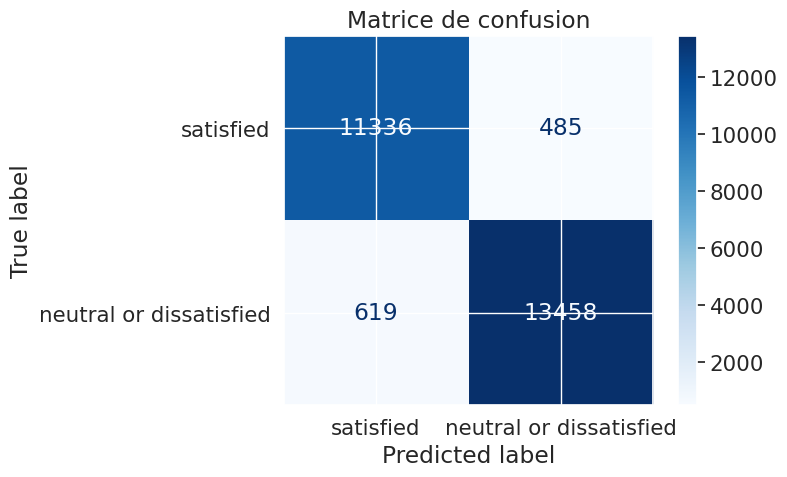

In [118]:
# Name the classes of the target
class_names = ["satisfied", "neutral or dissatisfied"]

# Prediction with the best model
best_model = None
best_accuracy = 0
best_model_name = ""
best_params = {}

for name, model in models.items():
    pipeline = joblib.load(f"{name}_model.pkl")
    accuracy = pipeline.score(X_test, y_test)
    if accuracy > best_accuracy:
        best_model = pipeline
        best_accuracy = accuracy
        best_model_name = name
        best_params = pipeline.named_steps['model'].get_params()
        

y_pred = best_model.predict(X_test)

# Metrics
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

# Print the best model and metrics
best_n_estimators = best_params['n_estimators']
best_n_jobs = best_params['n_jobs']
print(f"Le meilleur modèle est : {best_model_name}")
print(f"Les meilleurs hyperparamètres pour le modèle {best_model_name} sont : n_estimators = {best_n_estimators}, n_jobs = {best_n_jobs}")
disp = plot_confusion_matrix(best_model, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title("Matrice de confusion")

# Display feature importance
if best_model_name == "rf":
    importances = best_model.named_steps['model'].feature_importances_
    std = np.std([tree.feature_importances_ for tree in best_model.named_steps['model'].estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    print("Feature importance:")
    if 'preparation' in best_model.named_steps:
        feature_names = ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
    else:
        feature_names = X.columns
if 'col_OneHot' in best_model.named_steps:
    feature_names = X.columns.tolist() + best_model.named_steps['col_OneHot'].named_steps['onehot'].get_feature_names()
else:
    feature_names = X.columns

plt.figure()
plt.bar(["F1", "Accuracy"], [f1, accuracy])
plt.title("Métriques")
plt.ylim([0, 1])
plt.show()

#### 5- Features importance on the best model (RandomForest)

In [114]:
# Feature importance
importances = best_model.named_steps['model'].feature_importances_
onehot_encoder = best_model.named_steps['preparation'].named_transformers_['col_OneHot'].named_steps['onehot']
feature_names = onehot_encoder.get_feature_names_out(input_features=onehot_encoder.get_feature_names())
feature_importance = pd.Series(importances, index=feature_names)

feature_importance.sort_values(ascending=False)

KeyError: 'onehot'

In [113]:
# Feature importance
importances = best_model.named_steps['model'].feature_importances_
feature_names = onehot_encoder.get_feature_names_out(input_features=onehot_encoder.get_feature_names())
feature_importance = pd.Series(importances, index=feature_names)

# Print feature importances
feature_importance.sort_values(ascending=False)

NameError: name 'onehot_encoder' is not defined

In [ ]:
feature_importances = gs.best_estimator_.named_steps['model'].feature_importances_
feature_names = gs.best_estimator_.named_steps['preparation'].get_feature_names_out()

feature_importance = pd.Series({feature_names[i] : feature_importances[i] for i in range(len(feature_importances))})

feature_importance.sort_values(ascending=False)

In [112]:
# Display feature importance
if best_model_name == "rf":
    importances = best_model.named_steps['model'].feature_importances_
    std = np.std([tree.feature_importances_ for tree in best_model.named_steps['model'].estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    print("Feature importance:")
    feature_names = best_model.named_steps['preparation'].get_feature_names_out()
    for f in range(X.shape[1]):
        print(f"{feature_names[indices[f]]}: {importances[indices[f]]}")

Feature importance:


AttributeError: 'ColumnTransformer' object has no attribute 'get_feature_names_out'

In [99]:
best_model.named_steps['preparation']

ColumnTransformer(transformers=[('col_OneHot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Gender', 'Customer Type', 'Type of Travel',
                                  'Class']),
                                ('col_MinMax',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('encoder', MinMaxScaler())]),
                                 ['Inflight wifi service',
                                  '...,
                                  'Ease of Online booking', 'Gate

In [111]:
# Display feature importance (done with help of chatgpt and Adrien)
if best_model_name == "rf":
    importances = best_model.named_steps['model'].feature_importances_
    std = np.std([tree.feature_importances_ for tree in best_model.named_steps['model'].estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    print("Feature importance:")
    if 'preparation' in best_model.named_steps:
        feature_names = best_model.named_steps['preparation'].get_feature_names_out()
    else:
        feature_names = X.columns
    for f in range(X.shape[1]):
        print(f"{feature_names[indices[f]]}: {importances[indices[f]]}")

Feature importance:


AttributeError: 'ColumnTransformer' object has no attribute 'get_feature_names_out'